In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## Dimensionality Reduction

Dimensionality reduction is a process used in data analysis and machine learning to reduce the number of random variables under consideration by obtaining a set of principal variables. It is a crucial step in the data preprocessing pipeline, especially when dealing with high-dimensional datasets.

### Why Use Dimensionality Reduction?

1. **Simplification**: By reducing the number of dimensions, we simplify the dataset, making it easier to visualize and interpret.

2. **Noise Reduction**: It helps in removing noise and redundant features, which can improve the performance of machine learning models.

3. **Storage and Computation Efficiency**: Reducing dimensions can lead to less storage space and faster computation times, which is particularly beneficial for large datasets.

4. **Avoiding the Curse of Dimensionality**: High-dimensional data can lead to overfitting and increased complexity. Dimensionality reduction helps mitigate these issues by focusing on the most informative features.

5. **Improved Model Performance**: By focusing on the most important features, dimensionality reduction can enhance the performance of machine learning models.

### Common Techniques

- **Principal Component Analysis (PCA)**: A linear technique that transforms the data into a new coordinate system, where the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot.

- **Uniform Manifold Approximation and Projection (UMAP)**: A non-linear dimensionality reduction technique that is often used for visualization, similar to t-SNE, but is generally faster and can preserve more of the global structure.

### Use Cases

- **Data Visualization**: Reducing dimensions to 2D or 3D for visualization purposes, making it easier to understand complex datasets.

- **Feature Extraction**: Identifying the most important features that contribute to the variance in the data, which can be used for building more efficient models.

- **Preprocessing for Machine Learning**: Preparing data for machine learning algorithms that may not perform well with high-dimensional data.

- **Noise Reduction**: Filtering out noise from the data to improve the quality of the input for machine learning models.

Dimensionality reduction is a powerful tool in the data scientist's toolkit, enabling more efficient and effective data analysis and model building.



# The Iris Dataset
The Iris dataset is a classic and widely used dataset in machine learning. It contains measurements of 150 iris flowers from three different species: Setosa, Versicolor, and Virginica. For each flower, four features were measured:

1. Sepal length (cm)
2. Sepal width (cm) 
3. Petal length (cm)
4. Petal width (cm)

This dataset is often used for classification tasks and demonstrating dimensionality reduction techniques, as it contains multiple features that can be reduced to lower dimensions while preserving the distinguishing characteristics between species.


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
df  = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


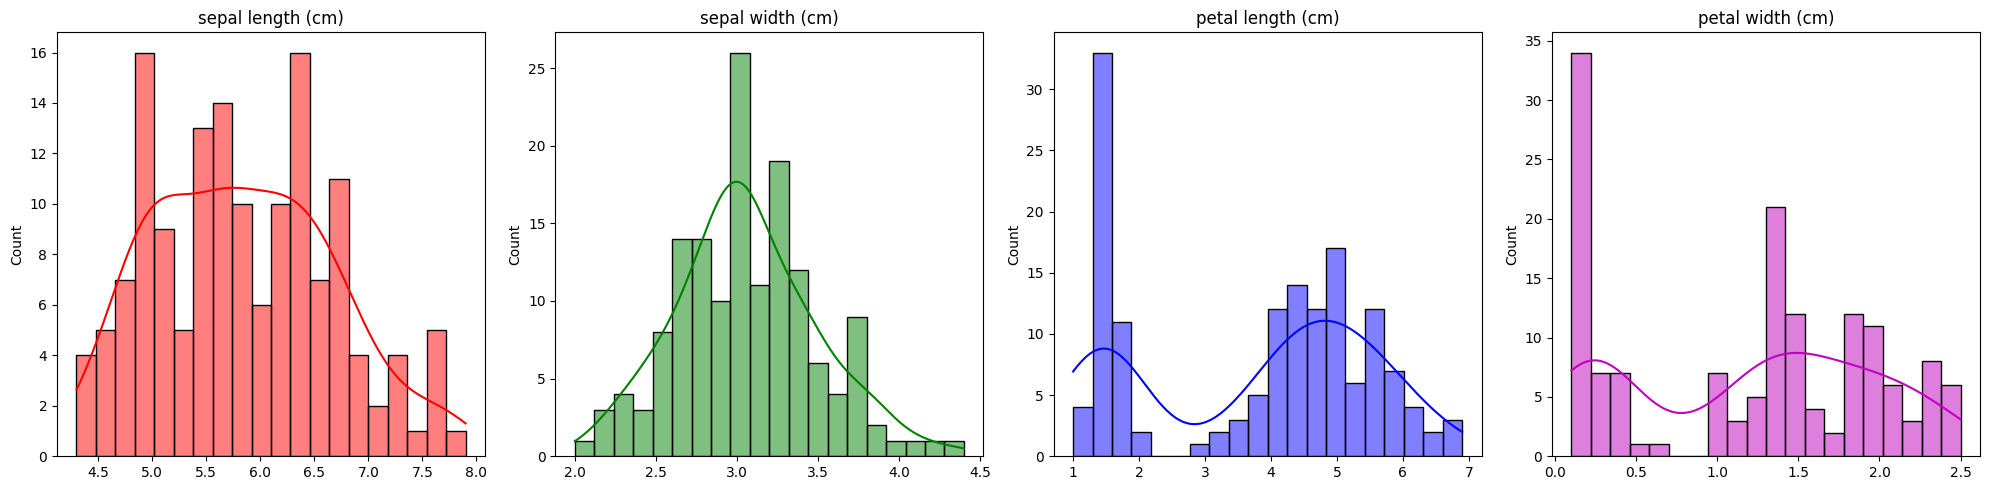

In [3]:
feature_names = iris.feature_names

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot each feature with a histogram and KDE
sns.histplot(X[:, 0], bins=20, kde=True, color='r', ax=axes[0])
axes[0].set_title(feature_names[0])

sns.histplot(X[:, 1], bins=20, kde=True, color='g', ax=axes[1])
axes[1].set_title(feature_names[1])

sns.histplot(X[:, 2], bins=20, kde=True, color='b', ax=axes[2])
axes[2].set_title(feature_names[2])

sns.histplot(X[:, 3], bins=20, kde=True, color='m', ax=axes[3])
axes[3].set_title(feature_names[3])

plt.tight_layout()
plt.show()

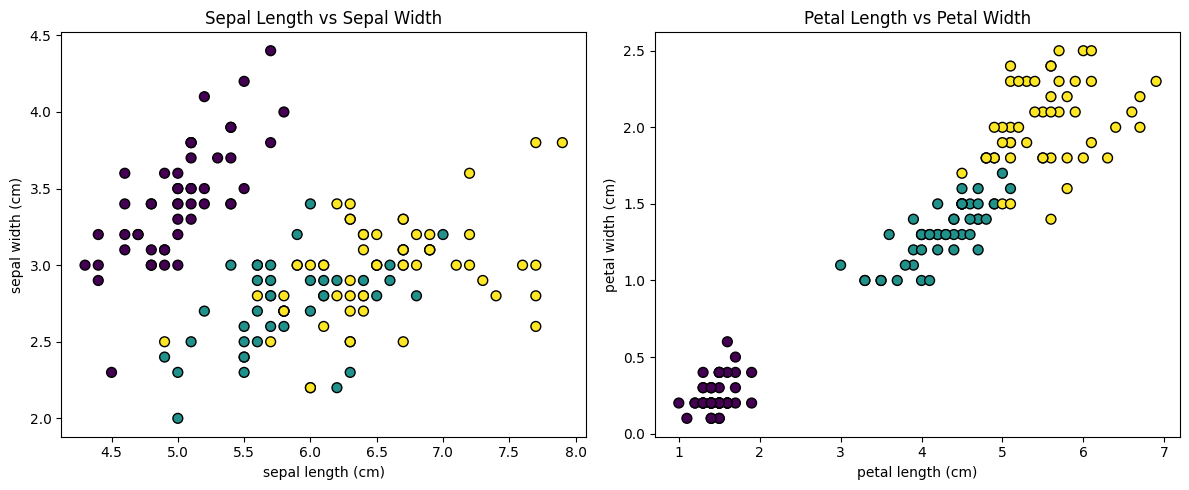

In [4]:
feature_names = iris.feature_names

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Sepal Length vs Sepal Width
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('Sepal Length vs Sepal Width')

# Plot Petal Length vs Petal Width
axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', edgecolor='k', s=50)
axes[1].set_xlabel(feature_names[2])
axes[1].set_ylabel(feature_names[3])
axes[1].set_title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

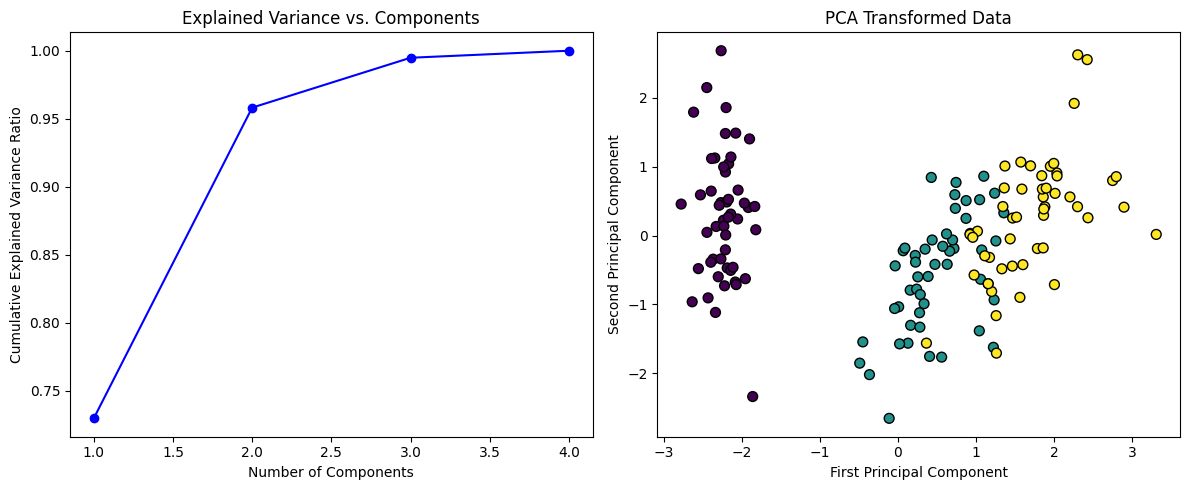

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# First fit PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
ax1.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Cumulative Explained Variance Ratio')
ax1.set_title('Explained Variance vs. Components')

# Now apply PCA with 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the transformed data
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('PCA Transformed Data')

plt.tight_layout()
plt.show()

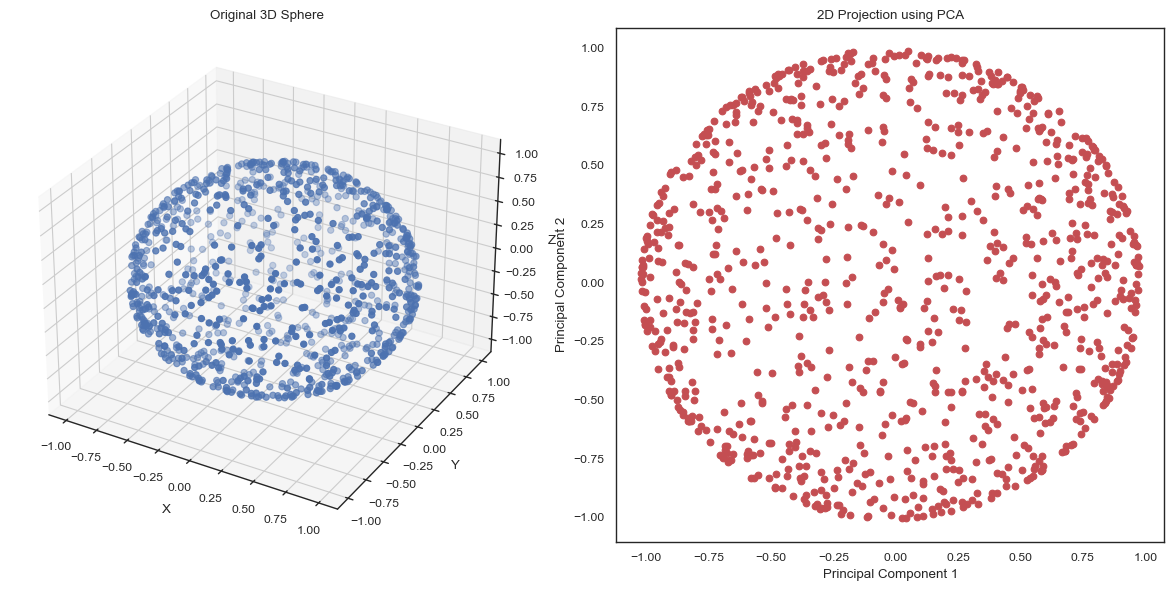

In [12]:
# Step 1: Generate synthetic 3D sphere data
np.random.seed(42)
n_points = 1000
# Generate points uniformly distributed on a sphere
phi = np.random.uniform(0, 2*np.pi, n_points)
cos_theta = np.random.uniform(-1, 1, n_points)
theta = np.arccos(cos_theta)

# Convert spherical coordinates to Cartesian coordinates
r = 1  # radius of sphere
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

X_3d = np.column_stack((x, y, z))

# Step 2: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_3d)

# Step 3: Plot the original 3D data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c='b', marker='o')
ax.set_title('Original 3D Sphere')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Step 4: Plot the 2D projection
ax2 = fig.add_subplot(122)
ax2.scatter(X_2d[:, 0], X_2d[:, 1], c='r', marker='o')
ax2.set_title('2D Projection using PCA')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

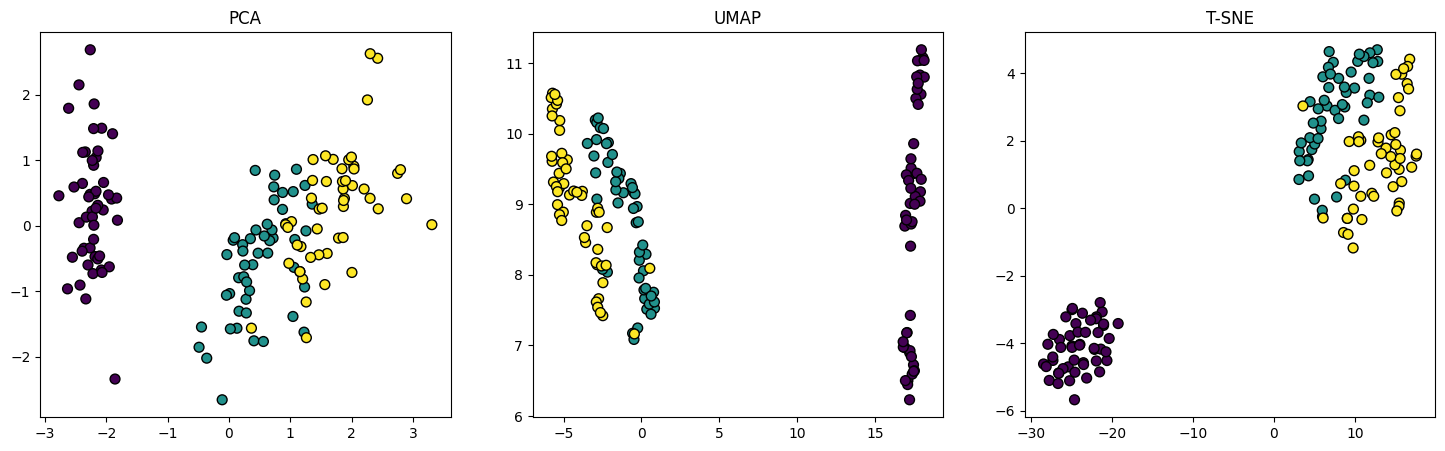

In [7]:
# Step 1: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply UMAP
import umap

umap_reducer = umap.UMAP(n_components=2)
X_umap = umap_reducer.fit_transform(X_scaled)

# Step 3: Apply T-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Visualize the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# PCA
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax[0].set_title('PCA')

# UMAP
ax[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax[1].set_title('UMAP')

# T-SNE
ax[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax[2].set_title('T-SNE')

plt.show()

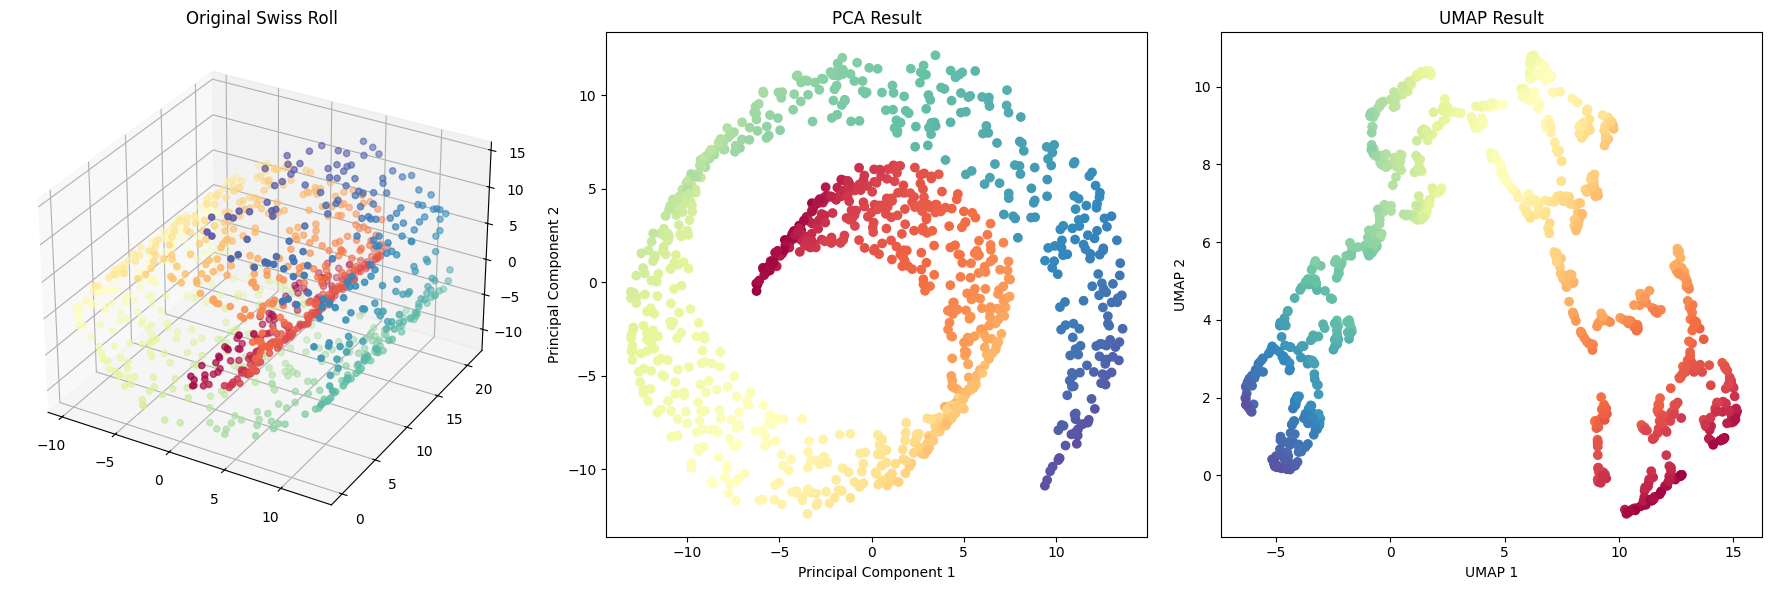

In [8]:
from sklearn.datasets import make_swiss_roll

# Generate the Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot the original Swiss Roll in 3D
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Original Swiss Roll')

# Plot the PCA result
ax2 = fig.add_subplot(132)
sc = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title('PCA Result')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

# Plot the UMAP result
ax3 = fig.add_subplot(133)
sc = ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.Spectral)
ax3.set_title('UMAP Result')
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()